In [35]:
import numpy as np
from numpy.fft import fft2,ifft2
from numpy import real,vectorize,exp
from math import pi
import matplotlib.pyplot as plt

In [36]:
u=np.zeros(10000).reshape(100,100)
v=np.zeros(10000).reshape(100,100)
p=np.zeros(10000).reshape(100,100)

In [37]:
#defining the domain
dx=0.001
dy=0.001
#kx=np.arange(0,100)*2*pi/(100*dx)
kx=(np.mod(1/2+np.arange(0,100)/100, 1)-0.5)*(2* pi /dx)
[Kx,Ky]=np.meshgrid(kx,kx)
k2=Kx*Kx+Ky*Ky

In [44]:
#Boundary conditions:
u[99]=np.zeros(100)
u[:,0]=np.zeros(100)
u[:,99]=np.zeros(100)
u[0]=np.ones(100)
v[0]=np.zeros(100)
v[99]=np.zeros(100)
v[:,0]=np.zeros(100)
v[:,99]=np.zeros(100)

In [45]:
#constants
nu=8.9e-04
dt=0.01

In [46]:
#using rk first order to find the second initializer to use in
#second order Adams-Bashforth type
dudx=real(ifft2(1j*Kx*fft2(u)))
dudy=real(ifft2(1j*Ky*fft2(u)))
dvdx=real(ifft2(1j*Kx*fft2(v)))
dvdy=real(ifft2(1j*Kx*fft2(v)))

Ax=u*dudx+v*dudy
Ay=u*dvdx+v*dvdy

Cxk=fft2(Ax)-(Kx/k2)*fft2(Ax)*Kx
Cxk[0,0]=0
Cyk=fft2(Ay)-(Ky/k2)*fft2(Ax)*Kx
Cyk[0,0]=0

u=real(ifft2(fft2(u)-(Cxk+nu*k2*fft2(u))))
v=real(ifft2(fft2(v)-(Cyk+nu*k2*fft2(v))))

#Boundary conditions:
u[99]=np.zeros(100)
u[:,0]=np.zeros(100)
u[0]=np.zeros(100)
u[99]=np.ones(100)*0.05
v[0]=np.zeros(100)
v[99]=np.zeros(100)
v[:,0]=np.zeros(100)
v[:,99]=np.zeros(100)

Cxk_n_1=Cxk
Cyk_n_1=Cyk

dudx=real(ifft2(1j*Kx*fft2(u)))
dudy=real(ifft2(1j*Ky*fft2(u)))
dvdx=real(ifft2(1j*Kx*fft2(v)))
dvdy=real(ifft2(1j*Kx*fft2(v)))

Ax=u*dudx+v*dudy
Ay=u*dvdx+v*dvdy

Cxk=fft2(Ax)-(Kx/k2)*fft2(Ax)*Kx
Cxk[0,0]=0
Cyk=fft2(Ay)-(Ky/k2)*fft2(Ax)*Kx
Cyk[0,0]=0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


In [47]:
for i in range(0,6000):
    u=real(ifft2(fft2(u)*exp(-1*nu*k2*dt)-(dt/2)*(3*exp(-1*nu*k2*dt)*Cxk-exp(-1*nu*k2*dt)*Cxk_n_1)))
    v=real(ifft2(fft2(v)*exp(-1*nu*k2*dt)-(dt/2)*(3*exp(-1*nu*k2*dt)*Cyk-exp(-1*nu*k2*dt)*Cyk_n_1)))

    #Boundary conditions:
    u[99]=np.zeros(100)
    u[:,0]=np.zeros(100)
    u[0]=np.zeros(100)
    u[99]=np.ones(100)*0.05
    v[0]=np.zeros(100)
    v[99]=np.zeros(100)
    v[:,0]=np.zeros(100)
    v[:,99]=np.zeros(100)

    Cxk_n_1=Cxk
    Cyk_n_1=Cyk

    dudx=real(ifft2(1j*Kx*fft2(u)))
    dudy=real(ifft2(1j*Ky*fft2(u)))
    dvdx=real(ifft2(1j*Kx*fft2(v)))
    dvdy=real(ifft2(1j*Kx*fft2(v)))

    Ax=u*dudx+v*dudy
    Ay=u*dvdx+v*dvdy

    Cxk=fft2(Ax)-(Kx/k2)*fft2(Ax)*Kx
    Cxk[0,0]=0
    Cyk=fft2(Ay)-(Ky/k2)*fft2(Ax)*Kx
    Cyk[0,0]=0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [48]:
u,v

(array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  ,  nan,  nan, ...,  nan,  nan,  nan],
        [0.  ,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [0.  ,  nan,  nan, ...,  nan,  nan,  nan],
        [0.  ,  nan,  nan, ...,  nan,  nan,  nan],
        [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., nan, nan, ..., nan, nan,  0.],
        [ 0., nan, nan, ..., nan, nan,  0.],
        ...,
        [ 0., nan, nan, ..., nan, nan,  0.],
        [ 0., nan, nan, ..., nan, nan,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

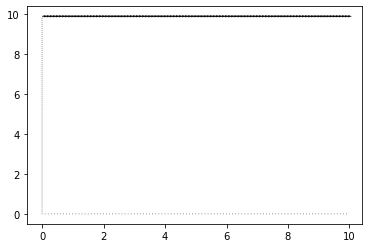

In [49]:
x=np.arange(0,10,0.1)
[X,Y]=np.meshgrid(x,x)
plt.quiver(X,Y,u,v)